# RF



## Data Set 1

In [1]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd



# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.5 MB/s eta 0:00:00


In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)
import pandas as pd

# Load data from the new Google Drive link
file_id = "1pI2WC2uOQARK3ayA6H4c1Eu2IRqURXbR"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the data
df = pd.read_csv(download_url)

# Backup original DataFrame
df_backup = df.copy()

# Create datetime directly from differently named columns
df['Date'] = pd.to_datetime({
    'year': df['YEAR'],
    'month': df['MO'],
    'day': df['DY']
})

# Set Date as the index
df = df.set_index('Date')

# Drop unnecessary columns
df = df.drop(columns=["YEAR", "MO", "DY"])

# Display the DataFrame (optional in scripts)
print(df.head())

            WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin    WD_cos  AVG_TEMP  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939  0.898028      26.4   
2013-01-04        4.75  86.31     22.93   8.79  0.424199  0.905569      25.1   
2013-01-05        5.74  86.88     22.17   2.60  0.563526  0.826098      26.9   
2013-01-06        5.79  88.09     23.47   1.65  0.460200  0.887815      27.3   
2013-01-07        4.52  93.04     24.04  27.41  0.368125  0.929776      25.9   

            WS10M_lag2  SURF_PRESSSURE  MAX_TEMP  RH_lag1  WD_sin_lag1  \
Date                                                                     
2013-01-03        3.99           99.68     28.38    86.19     0.500000   
2013-01-04        4.25           99.65     27.58    86.26     0.439939   
2013-01-05        4.75           99.50     26.16    86.31     0.424199   
2013-01-06        5.74           99.47     27.75    86.88     0.56352

In [3]:
df.columns

Index(['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'WD_cos', 'AVG_TEMP',
       'WS10M_lag2', 'SURF_PRESSSURE', 'MAX_TEMP', 'RH_lag1', 'WD_sin_lag1',
       'WD_sin_lag2', 'SL_PRESSURE', 'PREC_lag1', 'WS10M'],
      dtype='object')

In [4]:

df.columns
df

,WS10M_lag1,RH,MIN_TEMP,PREC,WD_sin,WD_cos,AVG_TEMP,WS10M_lag2,SURF_PRESSSURE,MAX_TEMP,RH_lag1,WD_sin_lag1,WD_sin_lag2,SL_PRESSURE,PREC_lag1,WS10M
Date,,,,,,,,,,,,,,,,
2013-01-03,4.25,86.26,23.42,13.42,0.439939,0.898028,26.4,3.99,99.68,28.38,86.19,0.500000,0.600420,1011.0,1.09,4.75
2013-01-04,4.75,86.31,22.93,8.79,0.424199,0.905569,25.1,4.25,99.65,27.58,86.26,0.439939,0.500000,1010.1,13.42,5.74
2013-01-05,5.74,86.88,22.17,2.60,0.563526,0.826098,26.9,4.75,99.50,26.16,86.31,0.424199,0.439939,1007.5,8.79,5.79
2013-01-06,5.79,88.09,23.47,1.65,0.460200,0.887815,27.3,5.74,99.47,27.75,86.88,0.563526,0.424199,1008.2,2.60,4.52
2013-01-07,4.52,93.04,24.04,27.41,0.368125,0.929776,25.9,5.79,99.46,26.70,88.09,0.460200,0.563526,1009.2,1.65,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6.01,88.57,24.40,9.45,0.381070,0.924546,29.5,4.29,99.66,30.35,86.27,0.483282,0.697165,1011.0,3.50,6.43
2023-12-28,6.43,90.59,25.51,13.93,0.634731,0.772734,28.5,6.01,99.58,29.37,88.57,0.381070,0.483282,1010.9,9.45,3.93
2023-12-29,3.93,89.03,25.03,9.80,0.689620,0.724172,28.2,6.43,99.69,29.30,90.59,0.634731,0.381070,1011.4,13.93,2.59


## Data Sets

# 1

In [5]:

df

,WS10M_lag1,RH,MIN_TEMP,PREC,WD_sin,WD_cos,AVG_TEMP,WS10M_lag2,SURF_PRESSSURE,MAX_TEMP,RH_lag1,WD_sin_lag1,WD_sin_lag2,SL_PRESSURE,PREC_lag1,WS10M
Date,,,,,,,,,,,,,,,,
2013-01-03,4.25,86.26,23.42,13.42,0.439939,0.898028,26.4,3.99,99.68,28.38,86.19,0.500000,0.600420,1011.0,1.09,4.75
2013-01-04,4.75,86.31,22.93,8.79,0.424199,0.905569,25.1,4.25,99.65,27.58,86.26,0.439939,0.500000,1010.1,13.42,5.74
2013-01-05,5.74,86.88,22.17,2.60,0.563526,0.826098,26.9,4.75,99.50,26.16,86.31,0.424199,0.439939,1007.5,8.79,5.79
2013-01-06,5.79,88.09,23.47,1.65,0.460200,0.887815,27.3,5.74,99.47,27.75,86.88,0.563526,0.424199,1008.2,2.60,4.52
2013-01-07,4.52,93.04,24.04,27.41,0.368125,0.929776,25.9,5.79,99.46,26.70,88.09,0.460200,0.563526,1009.2,1.65,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6.01,88.57,24.40,9.45,0.381070,0.924546,29.5,4.29,99.66,30.35,86.27,0.483282,0.697165,1011.0,3.50,6.43
2023-12-28,6.43,90.59,25.51,13.93,0.634731,0.772734,28.5,6.01,99.58,29.37,88.57,0.381070,0.483282,1010.9,9.45,3.93
2023-12-29,3.93,89.03,25.03,9.80,0.689620,0.724172,28.2,6.43,99.69,29.30,90.59,0.634731,0.381070,1011.4,13.93,2.59


In [6]:
###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)


In [7]:
# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]


In [8]:
numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
            WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin    WD_cos  AVG_TEMP  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939  0.898028      26.4   
2013-01-04        4.75  86.31     22.93   8.79  0.424199  0.905569      25.1   
2013-01-05        5.74  86.88     22.17   2.60  0.563526  0.826098      26.9   
2013-01-06        5.79  88.09     23.47   1.65  0.460200  0.887815      27.3   
2013-01-07        4.52  93.04     24.04  27.41  0.368125  0.929776      25.9   

            WS10M_lag2  SURF_PRESSSURE  MAX_TEMP  RH_lag1  WD_sin_lag1  \
Date                                                                     
2013-01-03        3.99           99.68     28.38    86.19     0.500000   
2013-01-04        4.25           99.65     27.58    86.26     0.439939   
2013-01-05        4.75           99.50     26.16    86.31     0.424199   
2013-01-06        5.74           99.47     27.75    86.88   

In [9]:
# Evaluation Function
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

In [10]:
# Evaluation Function
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2


# SVR

## Original


--- SVR Evaluation ---
Train (SVR) MSE: 0.3676
Train (SVR) RMSE: 0.6063
Train (SVR) MAE: 0.4450
Train (SVR) MAPE: 11.97%
Train (SVR) R²: 0.8541
Test (SVR) MSE: 0.5463
Test (SVR) RMSE: 0.7391
Test (SVR) MAE: 0.5641
Test (SVR) MAPE: 15.06%
Test (SVR) R²: 0.7735


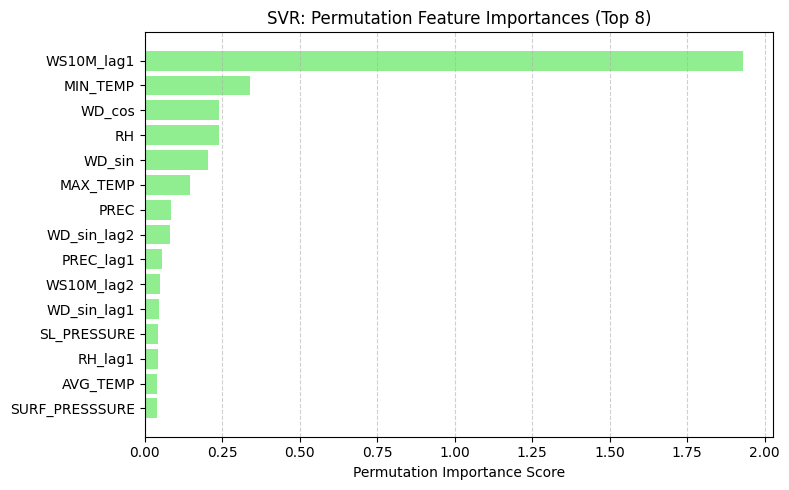

In [11]:
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set seed for reproducibility
RANDOM_SEED = 42
# === SCALING ADDITION ===
# Initialize scaler (using training data only)
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Fit and transform train
X_test_sub = scaler.transform(X_test)       # Transform test using train params


# Initialize the SVR model
svr_model = SVR(
    kernel='rbf',         # You can try 'linear', 'poly', 'sigmoid'
    C=1.0,                # Regularization parameter
    epsilon=0.1           # Margin of tolerance
)

# Fit the model
svr_model.fit(X_train_sub, y_train)

# Predict on train and test
y_train_pred_svr = svr_model.predict(X_train_sub)
y_test_pred_svr = svr_model.predict(X_test_sub)

# Evaluate (assumes evaluate() is defined)
print("\n--- SVR Evaluation ---")
evaluate(y_train, y_train_pred_svr, label="Train (SVR)")
evaluate(y_test, y_test_pred_svr, label="Test (SVR)")

# === Feature Importance using Permutation ===
result = permutation_importance(
    svr_model,
    X_test_sub,
    y_test,
    n_repeats=10,
    random_state=RANDOM_SEED,
    scoring='neg_mean_squared_error'
)

importance_df_svr = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df_svr['Feature'], importance_df_svr['Importance'], color='lightgreen')
plt.xlabel('Permutation Importance Score')
plt.title('SVR: Permutation Feature Importances (Top 8)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Grid Search

Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best Parameters:
{'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

--- Optimized SVR Evaluation ---
Train (SVR Optimized) MSE: 0.4046
Train (SVR Optimized) RMSE: 0.6361
Train (SVR Optimized) MAE: 0.4830
Train (SVR Optimized) MAPE: 13.30%
Train (SVR Optimized) R²: 0.8394
Test (SVR Optimized) MSE: 0.5375
Test (SVR Optimized) RMSE: 0.7331
Test (SVR Optimized) MAE: 0.5611
Test (SVR Optimized) MAPE: 15.16%
Test (SVR Optimized) R²: 0.7771


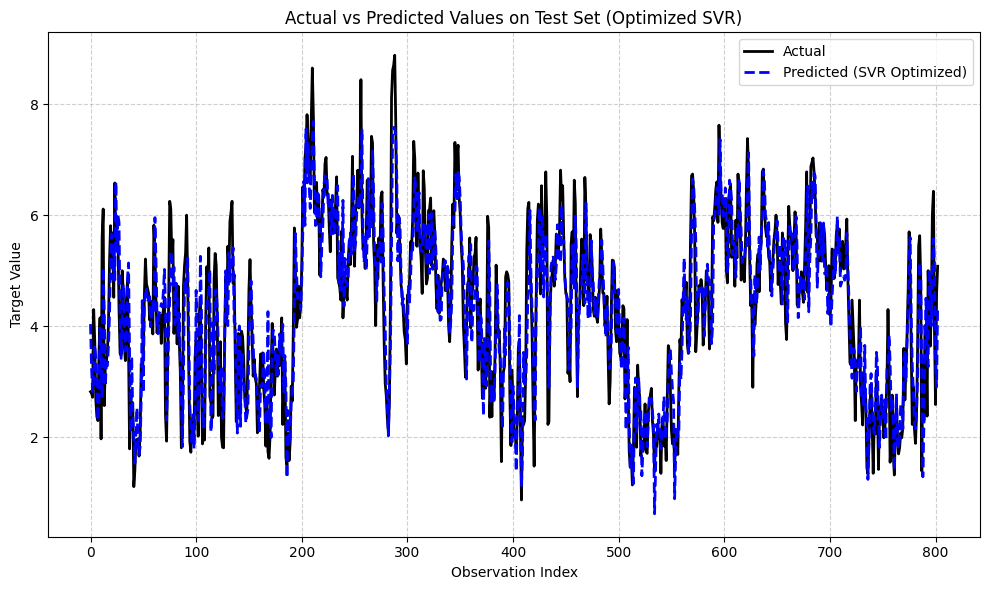

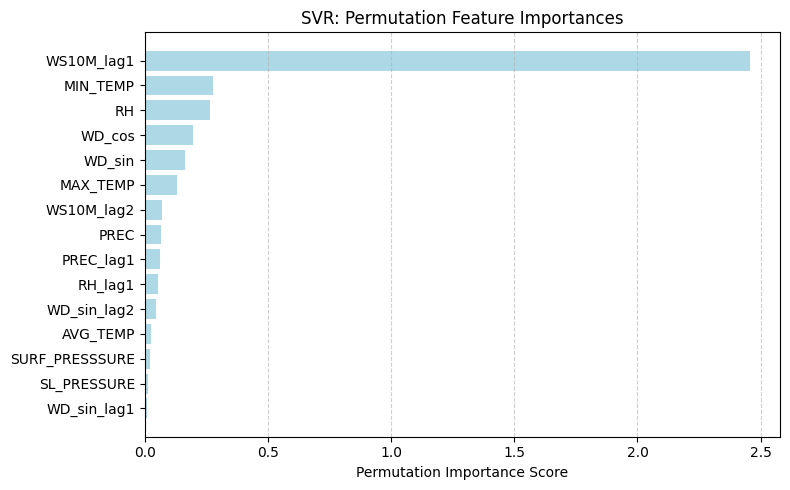

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Set reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# === SCALING ADDITION ===
# Initialize scaler (using training data only)
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Fit and transform train
X_test_sub = scaler.transform(X_test)       # Transform test using train params

# Define evaluation metric
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Extended hyperparameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.3],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']  # You can include 'linear' or 'poly' as well
}

# Initialize SVR model
svr = SVR()

# Time series-aware cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_train_sub, y_train)

# Best SVR model
best_svr = grid_search.best_estimator_
print("\nBest Parameters:")
print(grid_search.best_params_)

# Predict
y_train_pred_svr_opt = best_svr.predict(X_train_sub)
y_test_pred_svr_opt = best_svr.predict(X_test_sub)

# Evaluation
print("\n--- Optimized SVR Evaluation ---")
evaluate_metrics(y_train, y_train_pred_svr_opt, label="Train (SVR Optimized)")
evaluate_metrics(y_test, y_test_pred_svr_opt, label="Test (SVR Optimized)")

# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_svr_opt, label='Predicted (SVR Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized SVR)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: Permutation Feature Importance
perm_result = permutation_importance(
    best_svr,
    X_test_sub,
    y_test,
    n_repeats=10,
    random_state=RANDOM_SEED,
    scoring='neg_mean_squared_error'
)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Permutation Importance Score')
plt.title('SVR: Permutation Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Random Search

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters:
{'C': np.float64(11.686905952512971), 'epsilon': np.float64(0.2689310277626781), 'gamma': 0.01, 'kernel': 'rbf'}

--- Optimized SVR Evaluation ---
Train (SVR Optimized) MSE: 0.4001
Train (SVR Optimized) RMSE: 0.6325
Train (SVR Optimized) MAE: 0.4859
Train (SVR Optimized) MAPE: 13.45%
Train (SVR Optimized) R²: 0.8412
Test (SVR Optimized) MSE: 0.5348
Test (SVR Optimized) RMSE: 0.7313
Test (SVR Optimized) MAE: 0.5586
Test (SVR Optimized) MAPE: 15.14%
Test (SVR Optimized) R²: 0.7782


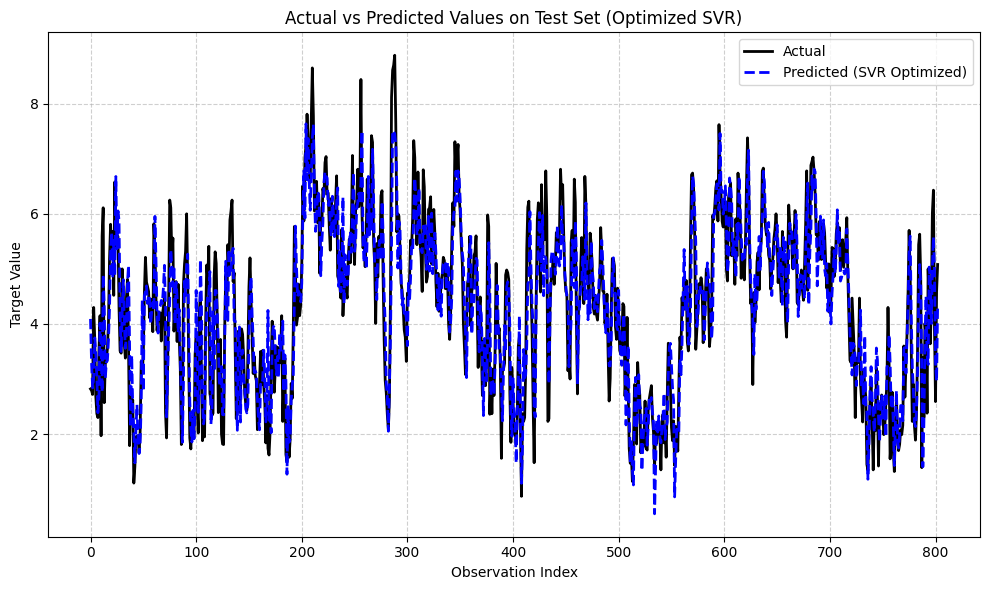

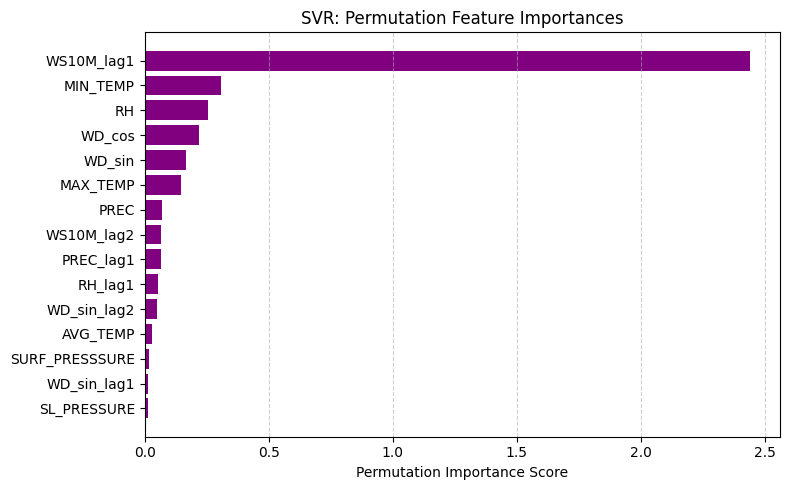

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from scipy.stats import uniform
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# === SCALING ADDITION ===
# Initialize scaler (using training data only)
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Fit and transform train
X_test_sub = scaler.transform(X_test)       # Transform test using train params


# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Evaluation Function
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Hyperparameter distribution for SVR
param_dist = {
    'C': uniform(loc=0.1, scale=100),         # Range: 0.1 to 100.1
    'epsilon': uniform(loc=0.01, scale=0.3),  # Range: 0.01 to 0.31
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf']                         # 'linear', 'poly' can be added
}

# Initialize model
svr = SVR()

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train_sub, y_train)

# Best model
best_svr = random_search.best_estimator_
print("\nBest Parameters:")
print(random_search.best_params_)

# Predictions
y_train_pred_svr_opt = best_svr.predict(X_train_sub)
y_test_pred_svr_opt = best_svr.predict(X_test_sub)

# Evaluation
print("\n--- Optimized SVR Evaluation ---")
evaluate_metrics(y_train, y_train_pred_svr_opt, label="Train (SVR Optimized)")
evaluate_metrics(y_test, y_test_pred_svr_opt, label="Test (SVR Optimized)")

# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_svr_opt, label='Predicted (SVR Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized SVR)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: Permutation Feature Importance (since SVR has no feature_importances_)
perm_result = permutation_importance(
    best_svr,
    X_test_sub,
    y_test,
    n_repeats=10,
    random_state=RANDOM_SEED,
    scoring='neg_mean_squared_error'
)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.xlabel('Permutation Importance Score')
plt.title('SVR: Permutation Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## optuna

[I 2025-07-23 04:22:25,164] A new study created in memory with name: no-name-e2d53a2c-83b8-4339-b2f0-ec5c4ea32141
[I 2025-07-23 04:22:26,272] Trial 0 finished with value: 2.378143613719962 and parameters: {'C': 1.3292918943162166, 'epsilon': 0.28570714885887566, 'gamma': 'scale', 'kernel': 'rbf'}. Best is trial 0 with value: 2.378143613719962.
[I 2025-07-23 04:22:27,928] Trial 1 finished with value: 0.569267516621405 and parameters: {'C': 39.67605077052987, 'epsilon': 0.18432335340553055, 'gamma': 0.001, 'kernel': 'rbf'}. Best is trial 1 with value: 0.569267516621405.
[I 2025-07-23 04:22:29,455] Trial 2 finished with value: 1.3931861776316612 and parameters: {'C': 0.3511356313970407, 'epsilon': 0.06318730785749581, 'gamma': 0.1, 'kernel': 'rbf'}. Best is trial 1 with value: 0.569267516621405.
[I 2025-07-23 04:22:31,444] Trial 3 finished with value: 0.8883082163172509 and parameters: {'C': 0.262108787826544, 'epsilon': 0.09472194807521325, 'gamma': 0.001, 'kernel': 'rbf'}. Best is trial


Best Trial:
FrozenTrial(number=26, state=1, values=[0.56277529011447], datetime_start=datetime.datetime(2025, 7, 23, 4, 23, 22, 680038), datetime_complete=datetime.datetime(2025, 7, 23, 4, 23, 24, 487261), params={'C': 59.440281134109306, 'epsilon': 0.2644284124804845, 'gamma': 0.001, 'kernel': 'rbf'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=100.0, log=True, low=0.1, step=None), 'epsilon': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'gamma': CategoricalDistribution(choices=('scale', 'auto', 0.001, 0.01, 0.1)), 'kernel': CategoricalDistribution(choices=('rbf',))}, trial_id=26, value=None)

Best Parameters:
{'C': 59.440281134109306, 'epsilon': 0.2644284124804845, 'gamma': 0.001, 'kernel': 'rbf'}

--- Optimized SVR Evaluation ---
Train (SVR Optimized) MSE: 0.4786
Train (SVR Optimized) RMSE: 0.6918
Train (SVR Optimized) MAE: 0.5321
Train (SVR Optimized) MAPE: 14.96%
Train (SVR Optimized) R²: 0.8100
Test (SVR Optim

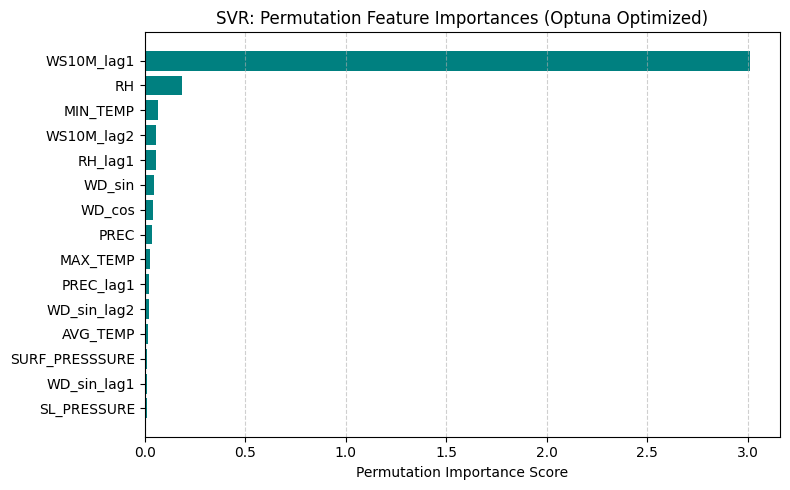

In [14]:
import optuna
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# === SCALING ADDITION ===
# Initialize scaler (using training data only)
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Fit and transform train
X_test_sub = scaler.transform(X_test)       # Transform test using train params


# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Evaluation function
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Optuna objective function for SVR
def svr_objective(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.1, 100.0),
        'epsilon': trial.suggest_float('epsilon', 0.01, 0.3),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto', 0.001, 0.01, 0.1]),
        'kernel': trial.suggest_categorical('kernel', ['rbf'])  # You can add 'linear', 'poly'
    }

    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_idx, val_idx in tscv.split(X_train_sub):
        X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = SVR(**params)
        model.fit(X_t, y_t)
        preds = model.predict(X_v)
        rmse = mean_squared_error(y_v, preds)
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Run Optuna optimization
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.RandomSampler(seed=RANDOM_SEED)
)
study.optimize(svr_objective, n_trials=30, timeout=300)

# Results
print("\nBest Trial:")
print(study.best_trial)
print("\nBest Parameters:")
print(study.best_params)

# Refit SVR model with best params
best_svr = SVR(**study.best_params)
best_svr.fit(X_train_sub, y_train)

# Predictions
y_train_pred_svr_opt = best_svr.predict(X_train_sub)
y_test_pred_svr_opt = best_svr.predict(X_test_sub)

# Evaluation
print("\n--- Optimized SVR Evaluation ---")
evaluate_metrics(y_train, y_train_pred_svr_opt, label="Train (SVR Optimized)")
evaluate_metrics(y_test, y_test_pred_svr_opt, label="Test (SVR Optimized)")

# Optional: Permutation Feature Importance
perm_result = permutation_importance(
    best_svr,
    X_test_sub,
    y_test,
    n_repeats=10,
    random_state=RANDOM_SEED,
    scoring='neg_mean_squared_error'
)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Permutation Importance Score')
plt.title('SVR: Permutation Feature Importances (Optuna Optimized)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


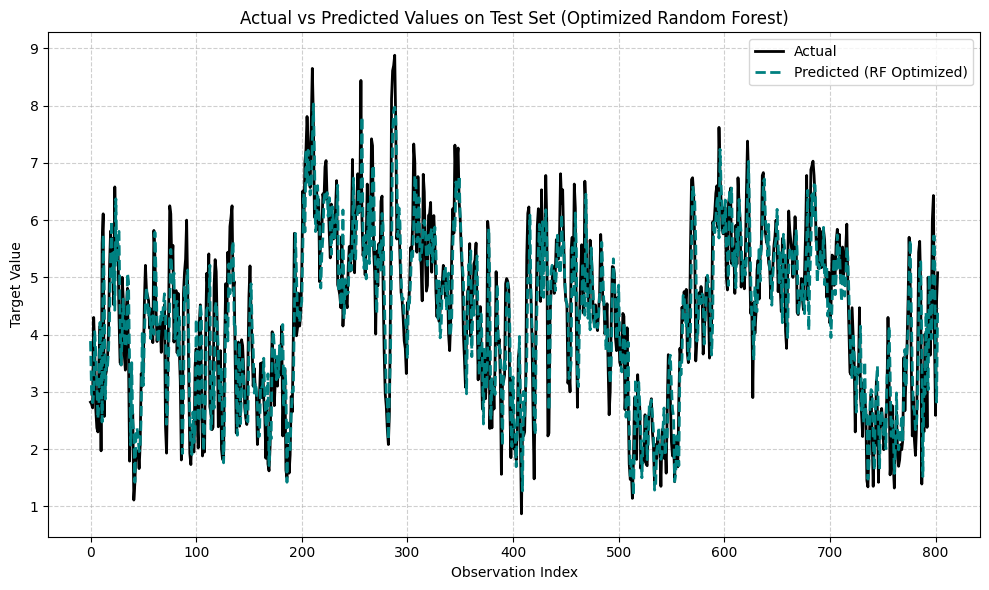

In [15]:
# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_svr_opt, label='Predicted (RF Optimized)', color='teal', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized Random Forest)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
